In [ ]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np

In [ ]:
filename="Company_Data.csv"
dataframe=read_csv(filename)
dataframe

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
#getting information of dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
dataframe.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
#Count of duplicated rows
dataframe[dataframe.duplicated()].shape

(0, 11)

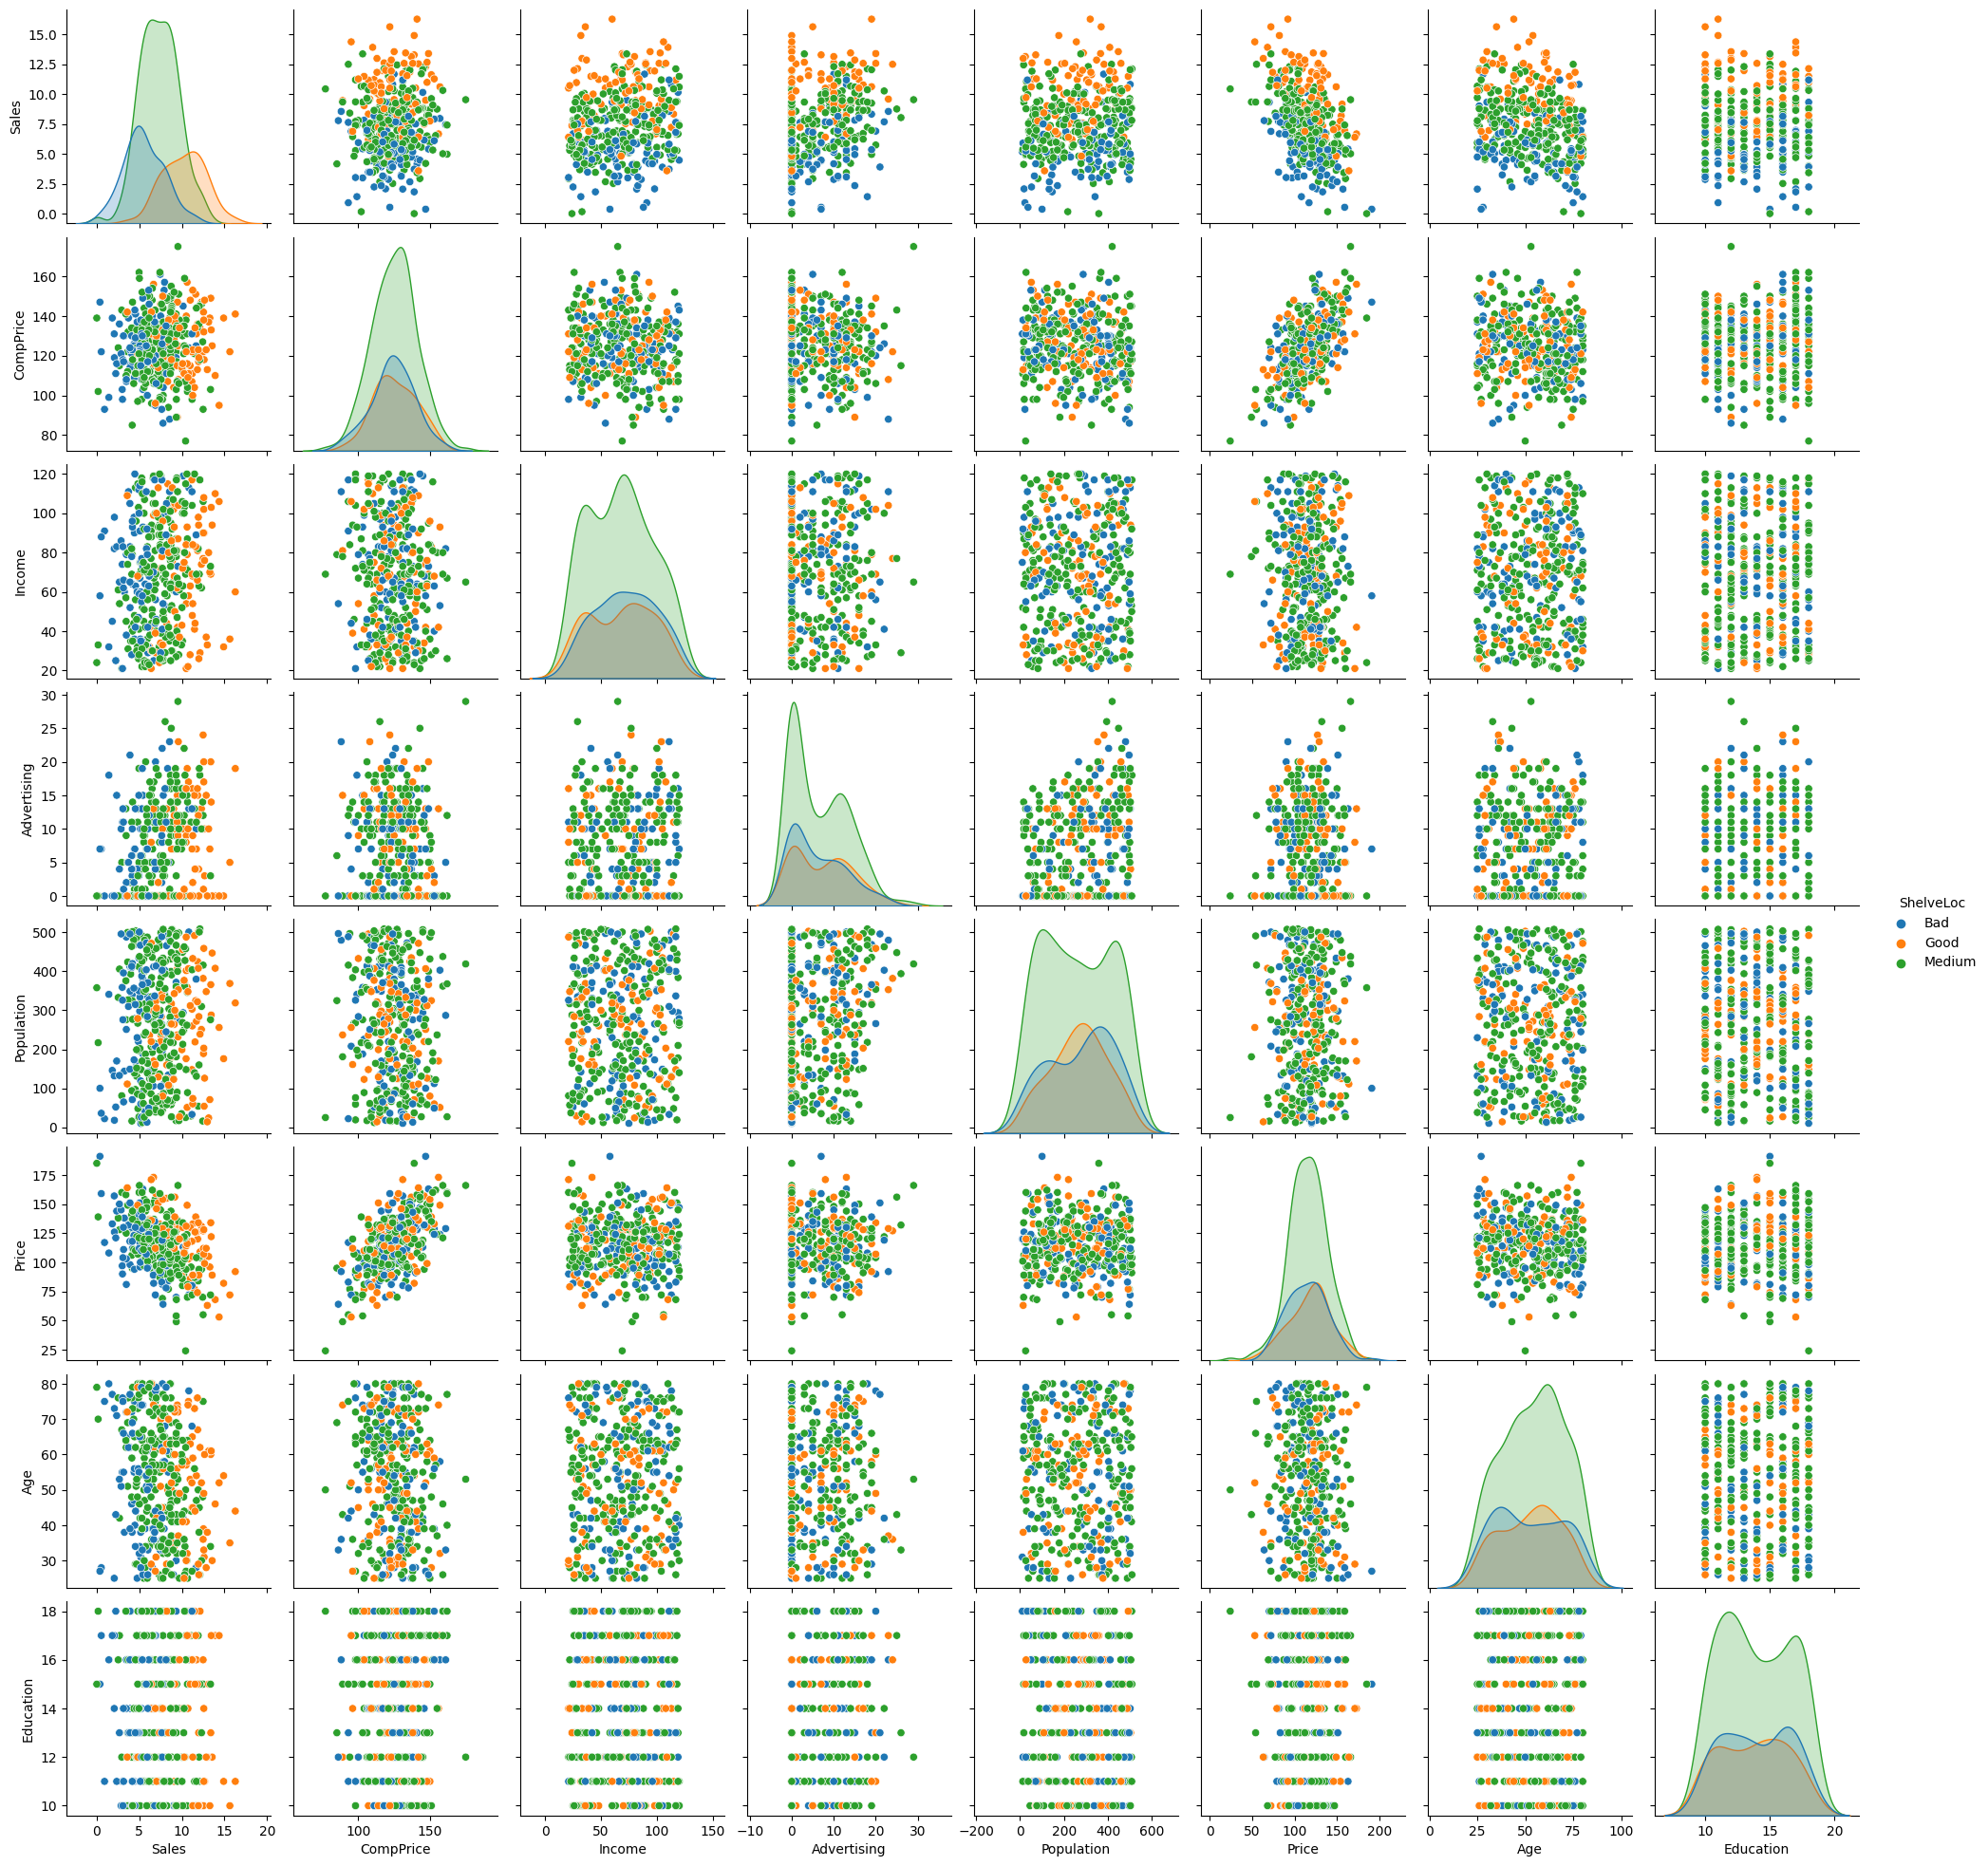

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=dataframe, hue = 'ShelveLoc')

In [ ]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(dataframe,columns=['Urban','US'], drop_first=True)

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:

df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder#for encoding
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Sales']= label_encoder.fit_transform(df['Sales'])

In [ ]:
df['Sales'].value_counts().head(10)

183    4
223    3
243    3
34     3
117    3
103    3
128    3
142    3
135    3
240    2
Name: Sales, dtype: int64

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,255,138,73,11,276,120,3,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,3,50,12,1,1


In [ ]:
x=df.iloc[:,1:]
y=df['Sales']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [ ]:
y

0      255
1      297
2      267
3      158
4       37
      ... 
395    320
396    114
397    159
398    106
399    262
Name: Sales, Length: 400, dtype: int64

In [ ]:
df['Sales'].unique()

array([255, 297, 267, 158,  37, 290, 133, 306, 129,  55, 234, 309,  33,
       291, 294, 219, 170, 315, 331, 220, 122, 314,  71, 103, 271, 333,
       203,  77,  16, 184, 330, 200, 117, 223,  13, 293, 230,  63, 131,
        21,   8, 189, 277,  36,  38,  51, 317,  45,  32, 284,   5,  46,
       187, 145,  61, 140, 307,   4,  86,  75, 202, 154,   6, 208, 183,
       227, 328, 190, 252, 126,  88, 321, 210, 286, 177,  47, 239, 191,
       165, 302,   9, 218, 304, 130, 188,  82,  58,  49, 228, 204,  93,
       253, 162, 318,  60,  35,  79,  70,  52,  90,   1,  24, 232, 233,
       132, 135, 110, 242, 209, 226, 169, 156, 141, 303, 142, 196, 229,
       245, 298, 127,  64,  48, 205, 257, 172,  28, 125,  74, 274, 316,
       111, 128, 161,   3, 237,  31, 282, 168, 300, 280, 289, 174, 105,
       143, 178, 163, 272, 319, 243,  53,  15,  27,  96, 198,   2, 137,
       153, 235, 120,   0, 167,  94, 279, 287, 182,  62, 160,  56,  81,
       263, 268, 216, 193, 313, 225, 326, 152,  40,  34,  11,  2

In [ ]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [ ]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,165.225000,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,94.449463,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,84.750000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,163.000000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,243.000000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,335.000000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
train_x.shape

(300, 10)

# RandomForestRegressor

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
num_trees = 100
max_features = 20
rf = RandomForestRegressor(n_estimators = num_trees, random_state = max_features)
# Train the model on training data
rf.fit(train_x, train_y);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 46.16 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 30.2 %.
